# Lesson 1, introduction to Pandas, Exercises

## Exercise 1: Series Creation and Operations

Create a Pandas Series that represents the number of bedrooms in different houses. Use custom string indexes representing the house names (e.g., "House A", "House B", etc.). Perform the following operations:

1. Create a Series with custom indexes
2. Access the number of bedrooms in "House B".
3. Calculate the average number of bedrooms in all houses.
4. Replace the number of bedrooms in "House C" with a new value.


In [ ]:
import pandas as pd

# Step 1: Create a Series with custom indexes
house_bedrooms = pd.Series([3, 4, 2, 5], index=['House A', 'House B', 'House C', 'House D'])

# Step 2: Access the number of bedrooms in "House B"
bedrooms_in_B = house_bedrooms['House B']
print(f"Number of bedrooms in House B: {bedrooms_in_B}")

# Step 3: Calculate the average number of bedrooms
average_bedrooms = house_bedrooms.mean()
print(f"Average number of bedrooms: {average_bedrooms}")

# Step 4: Replace the number of bedrooms in "House C"
house_bedrooms['House C'] = 3  # Assuming we are updating the value to 3
print("\nUpdated Series:")
print(house_bedrooms)

Exercise 2: DataFrame Manipulations

Given a DataFrame containing information about different houses (similar to the one in the lesson), perform the following tasks:

1. Filter the DataFrame to only include houses with more than 2 bathrooms.
2. Create a new DataFrame that contains only the 'Address' and 'Price' columns.
3. Use the .describe() method to get a summary of the 'Price' column.


In [ ]:
import pandas as pd

# Assume df is the given DataFrame
data = {
    'Address': ['123 Main St', '456 Elm St', '789 Oak St', '321 Pine St', '654 Maple St'],
    'Price': [500000, 600000, 450000, 700000, 550000],
    'Bedrooms': [3, 4, 2, 3, 3],
    'Bathrooms': [2, 3, 1.5, 3, 2]
}
df = pd.DataFrame(data)

# Step 1: Filter houses
filtered_df = df[df['Bathrooms'] > 2]
print("Houses with more than 2 bathrooms:")
print(filtered_df)

# Step 2: New DataFrame with specific columns
address_price_df = df[['Address', 'Price']]
print("\nDataFrame with 'Address' and 'Price':")
print(address_price_df)

# Step 3: Summary of the 'Price' column
price_summary = df['Price'].describe()
print("\nSummary of the 'Price' column:")
print(price_summary)

Exercise 3: Data Analysis and Manipulation

Using the original DataFrame from the lesson (with 'Address' as indexes), perform the following:

1. Access the data of the house located at '789 Oak St'.
2. Update the price of the house at '123 Main St' to a new value.
3. Find out the mean price of houses with 3 bedrooms.


In [ ]:
import pandas as pd

# We assume the DataFrame has been set with 'Address' as the index
df.set_index('Address', inplace=True)

# Step 1: Access data for '789 Oak St'
house_data = df.loc['789 Oak St']
print("Data for '789 Oak St':")
print(house_data)

# Step 2: Update price for '123 Main St'
df.loc['123 Main St', 'Price'] = 520000  # Assume the new price is 520,000
print("\nUpdated price for '123 Main St':")
print(df.loc['123 Main St'])

# Step 3: Mean price for houses with 3 bedrooms
mean_price = df[df['Bedrooms'] == 3]['Price'].mean()
print(f"\nMean price for houses with 3 bedrooms: {mean_price}")

# Lesson 2 Exercises

## Exercise 1

Using the pands library and WGET retrieve the following file from github and examine it contents

https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/new_customers_attempt_a.csv



In [ ]:
import pandas as pd

# WGET with HTTPS file path

!wget https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/new_customers_attempt_a.csv

# Load the dataset
customer_df = pd.read_csv('new_customers_attempt_a.csv')

customer_df.head()

## Exercise 2

Using the requests and BeautifulSoup libraries get the stock price for another NASDAQ exchange stock such as NVDA which has the ticker for NVIDIA


In [ ]:
import requests
from bs4 import BeautifulSoup

# Send an HTTP GET request to the Google Finance page for NVIDIA's stock
url = "https://www.google.com/finance/quote/NVDA:NASDAQ"
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the element containing the stock price
    price_element = soup.find("div", class_="YMlKec fxKbKc")

    if price_element:
        # Extract and print the stock price
        stock_price = price_element.text.strip()
        print(f"NVIDIA's stock price: {stock_price}")
    else:
        print("Stock price element not found on the page.")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

# Lesson 3: Data Cleaning Exercises

Exercise 1: Handling Missing Values
You have a DataFrame house_data that contains a dataset with missing values. Your task is to identify the columns with missing values and impute them using the mean of each column.

In [ ]:
import pandas as pd

# Load the house price dataset
house_data = pd.read_csv('https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/kaggle-house-price-data-set.csv')

# Check for missing values
missing_values = house_data.isnull().sum()

# Find columns with missing values greater than zero
columns_with_missing = house_data.columns[house_data.isnull().sum() > 0]

# Impute missing values with column means
house_data_imputed = house_data.fillna(house_data.mean())

# Print the columns with missing values before and after imputation
print("Columns with missing values before imputation:", columns_with_missing)
print("\nColumns with missing values after imputation:", house_data_imputed.columns[house_data_imputed.isnull().sum() > 0])

## Exercise 2: Handling Outliers

You have a DataFrame house_data that contains a dataset with potential outliers in the 'SalePrice' column. Your task is to identify and remove these outliers based on statistical thresholds.  

Hint. Use quantile(0.25) and quantile(0.75)

In [ ]:
# Remove outliers based on statistical thresholds
Q1 = house_data['SalePrice'].quantile(0.25)
Q3 = house_data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
house_data_clean = house_data[(house_data['SalePrice'] >= Q1 - 1.5*IQR) & (house_data['SalePrice'] <= Q3 + 1.5*IQR)]

print(house_data_clean)

## Exercise 3: Handling Duplicates

You have a DataFrame house_data that contains a dataset with duplicate rows. Your task is to identify and remove these duplicate rows based on all columns.

In [ ]:
# Find duplicate records based on all columns
duplicate_rows = house_data[house_data.duplicated()]

# Drop the duplicate rows
house_data_clean = house_data.drop_duplicates()

# Lesson 4 Data Transformaton Exercises

## Exercise 1: Data Conversion

Given a pandas Series num_series with numerical values, convert it to a float using NumPy. Here an example series

    num_series = pd.Series([3, 7, 11, 22, 8])



In [ ]:
import pandas as pd
import numpy as np

# Create a pandas Series
num_series = pd.Series([3, 7, 11, 22, 8])

# Convert num_series to a float using NumPy
converted_series = num_series.astype(np.float64)

# Display the converted Series
print(converted_series)

## Exercise 2: Categorical Conversion

Assume you have a DataFrame df with a column 'Bedrooms' containing string values like "one," "two," etc. Convert these string values to numeric using a mapping dictionary (map).  Here is some data structure hints.

    'Bedrooms': ['three', 'four', 'two', 'three', 'three']

    bedroom_mapping = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}

In [ ]:
import pandas as pd

# Create a DataFrame with house data
data = {
    'Bedrooms': ['three', 'four', 'two', 'three', 'three']
}

df = pd.DataFrame(data)

# Create a mapping dictionary for converting string values to numeric
bedroom_mapping = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}

# Convert 'Bedrooms' column to numeric using mapping
df['Bedrooms'] = df['Bedrooms'].map(bedroom_mapping)

# Display the DataFrame after conversion
print(df)

## Exercise 3: Min-Max Scaling


Given a DataFrame df with numerical columns, perform Min-Max scaling on the columns to rescale the data between 0 and 1.

In [ ]:
import pandas as pd

# Create a DataFrame with housing data
data = {
    'Price': [500000, 600000, 450000, 700000, 550000],
    'Bedrooms': [3, 4, 2, 3, 3],
    'Bathrooms': [2, 2.5, 1.5, 3, 2],
    'Area': [1500, 2000, 1200, 1800, 1600]
}

df = pd.DataFrame(data)

# Perform Min-Max Scaling on the numerical columns
df_normalized = (df - df.min()) / (df.max() - df.min())

# Display the DataFrame after Min-Max Scaling
print(df_normalized)

# Lesson 5 Exercises

 Exercises

## Exercise 1: Filtering Data

Filter the house dataset to display houses with more than 3 bedrooms. You can start with the following code. Recase the column name for bedrooms is BedroomAbvGr

    import pandas as pd

    # Get the house price dataset
    !wget https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/kaggle-house-price-data-set.csv

    # Load the dataset
    house_df = pd.read_csv('kaggle-house-price-data-set.csv')


In [ ]:
import pandas as pd

# Get the house price dataset
!wget https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/kaggle-house-price-data-set.csv

# Load the dataset
house_df = pd.read_csv('kaggle-house-price-data-set.csv')

# Filter houses with more than 3 bedrooms
filtered_df = house_df[house_df['BedroomAbvGr'] > 3]

# Display the filtered DataFrame
print(filtered_df)



## Exercise 2: Grouping Data

Group the house dataset by 'Neighborhood' and calculate the mean sale price for each neighborhood.

In [ ]:
import pandas as pd

# Load the house dataset
house_df = pd.read_csv('kaggle-house-price-data-set.csv')

# Group the data by 'Neighborhood' and calculate the mean sale price
grouped_data = house_df.groupby('Neighborhood')['SalePrice'].mean()

# Display the grouped data
print(grouped_data)


## Exercise 3: Appending Data

Create two DataFrames, df1 and df2, with the same column names ('A' and 'B') with the following data and append df2 below df1.

    df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
    df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})


In [ ]:
import pandas as pd

# Create two example DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# Append df2 below df1
appended_df = pd.concat([df1, df2], axis=0, ignore_index=True)

# Display the appended DataFrame
print(appended_df)

# Lesson 6: Data Explorationand Visualization Exercies

## Exercise 1: Creating a Scatter Plot

Use the following code to get data to create a house_df dataframe

    house_data = pd.read_csv('https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/kaggle-house-price-data-set.csv')


The DataFrame house_df contains data about the house lot area (land plot) and their respective prices. Your task is to create a scatter plot to visualize the relationship between house size (LotArea) and price (SalePrice).

What does this scatterploat tell you abuot the relationship between LotArea and SalePrice ?

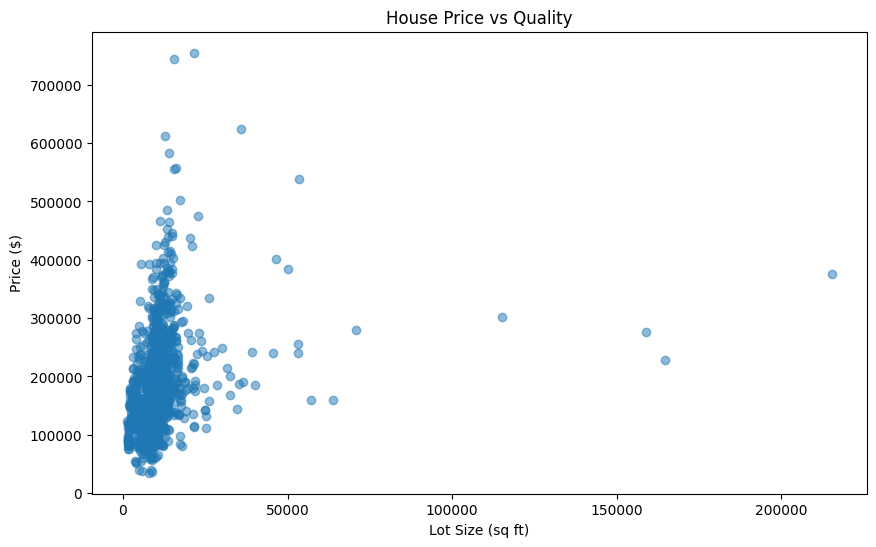

In [7]:
import matplotlib.pyplot as plt

import pandas as pd

# Load the house price dataset
house_data = pd.read_csv('https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/kaggle-house-price-data-set.csv')

house_df = pd.DataFrame(house_data)

# Creating a scatter plot for 'Size' vs 'Price'
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.scatter(house_df['LotArea'], house_df['SalePrice'], alpha=0.5)  # alpha sets the transparency of the points

plt.title('House Price vs Quality')
plt.xlabel('Lot Size (sq ft)')
plt.ylabel('Price ($)')

# Display the plot
plt.show()